# LAB4

In [1]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

#### Создание дата фрейма

In [2]:
df = pd.read_csv("annotations.csv", delimiter=",", usecols = (0, 2), names = ("Absolute Path", "Name"))
print(df.head(5))
print(df.tail(5))

                                    Absolute Path        Name
0  D:\Code\3sem\proga\dataset\brown bear\0000.jpg  brown bear
1  D:\Code\3sem\proga\dataset\brown bear\0001.jpg  brown bear
2  D:\Code\3sem\proga\dataset\brown bear\0002.jpg  brown bear
3  D:\Code\3sem\proga\dataset\brown bear\0003.jpg  brown bear
4  D:\Code\3sem\proga\dataset\brown bear\0004.jpg  brown bear
                                       Absolute Path        Name
1995  D:\Code\3sem\proga\dataset\polar bear\0995.jpg  polar bear
1996  D:\Code\3sem\proga\dataset\polar bear\0996.jpg  polar bear
1997  D:\Code\3sem\proga\dataset\polar bear\0997.jpg  polar bear
1998  D:\Code\3sem\proga\dataset\polar bear\0998.jpg  polar bear
1999  D:\Code\3sem\proga\dataset\polar bear\0999.jpg  polar bear


#### Добваление столбца Label

In [3]:
df["Label"] = df["Name"].apply(lambda x: 0 if x == "polar bear" else 1)
print(df.head(5))
print(df.tail(5))

                                    Absolute Path        Name  Label
0  D:\Code\3sem\proga\dataset\brown bear\0000.jpg  brown bear      1
1  D:\Code\3sem\proga\dataset\brown bear\0001.jpg  brown bear      1
2  D:\Code\3sem\proga\dataset\brown bear\0002.jpg  brown bear      1
3  D:\Code\3sem\proga\dataset\brown bear\0003.jpg  brown bear      1
4  D:\Code\3sem\proga\dataset\brown bear\0004.jpg  brown bear      1
                                       Absolute Path        Name  Label
1995  D:\Code\3sem\proga\dataset\polar bear\0995.jpg  polar bear      0
1996  D:\Code\3sem\proga\dataset\polar bear\0996.jpg  polar bear      0
1997  D:\Code\3sem\proga\dataset\polar bear\0997.jpg  polar bear      0
1998  D:\Code\3sem\proga\dataset\polar bear\0998.jpg  polar bear      0
1999  D:\Code\3sem\proga\dataset\polar bear\0999.jpg  polar bear      0


#### Добавление колонок Height, Width, Depth

In [4]:
df["Height"] = df["Absolute Path"].apply(lambda path: cv2.imread(path).shape[0])
df["Width"] = df["Absolute Path"].apply(lambda path: cv2.imread(path).shape[1])
df["Depth"] = df["Absolute Path"].apply(lambda path: cv2.imread(path).shape[2])
print(df.head(5))
print(df.tail(5))

                                    Absolute Path        Name  Label  Height  \
0  D:\Code\3sem\proga\dataset\brown bear\0000.jpg  brown bear      1     301   
1  D:\Code\3sem\proga\dataset\brown bear\0001.jpg  brown bear      1     320   
2  D:\Code\3sem\proga\dataset\brown bear\0002.jpg  brown bear      1     300   
3  D:\Code\3sem\proga\dataset\brown bear\0003.jpg  brown bear      1     320   
4  D:\Code\3sem\proga\dataset\brown bear\0004.jpg  brown bear      1     320   

   Width  Depth  
0    480      3  
1    480      3  
2    480      3  
3    476      3  
4    480      3  
                                       Absolute Path        Name  Label  \
1995  D:\Code\3sem\proga\dataset\polar bear\0995.jpg  polar bear      0   
1996  D:\Code\3sem\proga\dataset\polar bear\0996.jpg  polar bear      0   
1997  D:\Code\3sem\proga\dataset\polar bear\0997.jpg  polar bear      0   
1998  D:\Code\3sem\proga\dataset\polar bear\0998.jpg  polar bear      0   
1999  D:\Code\3sem\proga\dataset\pol

####  Статистическая информация

In [5]:
stat_info0 = df[df["Label"] == 0]["Height"].describe()
print(stat_info0)
stat_info1 = df[df["Label"] == 1]["Height"].describe()
print(stat_info1)

count    1000.000000
mean      283.389000
std        48.771347
min       200.000000
25%       259.000000
50%       318.000000
75%       320.000000
max       320.000000
Name: Height, dtype: float64
count    1000.000000
mean      296.958000
std        39.394189
min       200.000000
25%       300.000000
50%       320.000000
75%       320.000000
max       320.000000
Name: Height, dtype: float64


#### Фильтрация по классу

In [8]:
def filter_class(df: pd.DataFrame, class_label: int):
    '''
    Возвращает dataframe путем фильтрации переданного dataframe по метке класса
    Parameters
        df : pd.DataFrame
        датафрейм
        class_label : int
        Метка класса
    '''
    return df[df["Label"] == class_label]

print(filter_class(df, 0))

                                       Absolute Path        Name  Label  \
1000  D:\Code\3sem\proga\dataset\polar bear\0000.jpg  polar bear      0   
1001  D:\Code\3sem\proga\dataset\polar bear\0001.jpg  polar bear      0   
1002  D:\Code\3sem\proga\dataset\polar bear\0002.jpg  polar bear      0   
1003  D:\Code\3sem\proga\dataset\polar bear\0003.jpg  polar bear      0   
1004  D:\Code\3sem\proga\dataset\polar bear\0004.jpg  polar bear      0   
...                                              ...         ...    ...   
1995  D:\Code\3sem\proga\dataset\polar bear\0995.jpg  polar bear      0   
1996  D:\Code\3sem\proga\dataset\polar bear\0996.jpg  polar bear      0   
1997  D:\Code\3sem\proga\dataset\polar bear\0997.jpg  polar bear      0   
1998  D:\Code\3sem\proga\dataset\polar bear\0998.jpg  polar bear      0   
1999  D:\Code\3sem\proga\dataset\polar bear\0999.jpg  polar bear      0   

      Height  Width  Depth  
1000     305    480      3  
1001     300    480      3  
1002     319

####  Фильтрация по размеру и классу

In [9]:
def size_filter(df: pd.DataFrame, class_label: int, max_height: int, max_width: int):
    '''
    Возвращает dataframe путем фильтрации переданного dataframe по метке класса, максимальной высоте и ширине
    Parameters
        df : pd.DataFrame
        датафрейм
        class_label : int
        Метка класса
        max_height : int
        Максимальная высота изображения
        max_width : int
        Максимальная ширина изображения
    '''
    return df[(df["Label"] == class_label) & (df["Height"] <= max_height) & (df["Width"] <= max_width)]

print(size_filter(df, 1, 400, 300))

                                      Absolute Path        Name  Label  \
22   D:\Code\3sem\proga\dataset\brown bear\0022.jpg  brown bear      1   
28   D:\Code\3sem\proga\dataset\brown bear\0028.jpg  brown bear      1   
39   D:\Code\3sem\proga\dataset\brown bear\0039.jpg  brown bear      1   
59   D:\Code\3sem\proga\dataset\brown bear\0059.jpg  brown bear      1   
74   D:\Code\3sem\proga\dataset\brown bear\0074.jpg  brown bear      1   
..                                              ...         ...    ...   
971  D:\Code\3sem\proga\dataset\brown bear\0971.jpg  brown bear      1   
972  D:\Code\3sem\proga\dataset\brown bear\0972.jpg  brown bear      1   
974  D:\Code\3sem\proga\dataset\brown bear\0974.jpg  brown bear      1   
975  D:\Code\3sem\proga\dataset\brown bear\0975.jpg  brown bear      1   
996  D:\Code\3sem\proga\dataset\brown bear\0996.jpg  brown bear      1   

     Height  Width  Depth  
22      320    213      3  
28      320    213      3  
39      320    213      3  

#### Группировка

In [10]:
def df_group(df: pd.DataFrame, class_label: int):
    '''
    Возвращает dataframe группируя по метке класса, вычисляя максимальное, минимальное и среднее значения по количеству пикселей
    Parameters
        df : pd.DataFrame
        датафрейм
        class_label : int
        Метка класса
    '''
    filtered_df = filter_class(df, class_label)
    pixel_counts = []
    
    for path in filtered_df["Absolute Path"]:
        img = cv2.imread(path)
        pixel_counts.append(img.size)
    
    filtered_df["pixels"] = pixel_counts
    filtered_df.groupby("pixels").count()
    print(filtered_df["pixels"].describe())
df_group(df, 1)

count      1000.000000
mean     387841.920000
std       86845.484802
min      170880.000000
25%      353160.000000
50%      432000.000000
75%      460080.000000
max      460800.000000
Name: pixels, dtype: float64


C:\Users\Denis\AppData\Local\Temp\ipykernel_5248\339835716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["pixels"] = pixel_counts


#### Построение гистограммы

In [11]:
def build_histogram(df: pd.DataFrame, class_label: int):
    '''
    Строит гистограмму
    Parameters
        df : pd.DataFrame
        датафрейм
        class_label : int
        Метка класса
    '''
    random_image = df[df["Label"] == class_label].sample(1)
    image_path = random_image["Absolute Path"].values[0]
    image = cv2.imread(image_path)
    b, g, r = cv2.split(image)
    arr = []
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    arr.append(hist_b)
    arr.append(hist_g)
    arr.append(hist_r)
    return arr

####  Отрисовка гистограммы

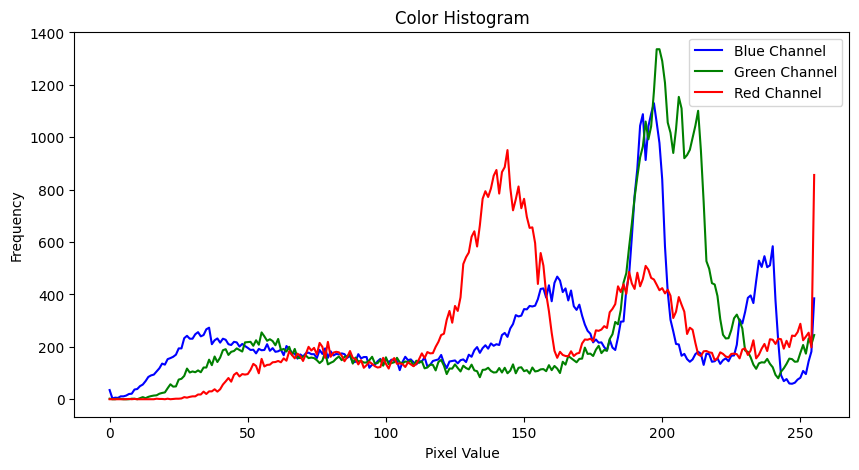

In [14]:
def plot_histogram(df: pd.DataFrame, class_label: int):
    '''
    Строит гистограмму
    Parameters
        df : pd.DataFrame
        датафрейм
        class_label : int
        Метка класса
    '''
    hist = build_histogram(df, class_label)
    plt.figure(figsize=(10, 5))
    plt.plot(hist[0], color='b', label='Blue Channel')
    plt.plot(hist[1], color='g', label='Green Channel')
    plt.plot(hist[2], color='r', label='Red Channel')
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_histogram(df, 1)